In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [13]:
olddata = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2023m02d15.nc')

In [4]:
data_u = xr.open_dataset('/results/forcing/atmospheric/continental2.5/GRIB/20230215/00/001/20230215T00Z_MSC_HRDPS_UGRD_AGL-10m_RLatLon0.0225_PT001H.grib2',
                        engine='cfgrib')

In [7]:
data_v = xr.open_dataset('/results/forcing/atmospheric/continental2.5/GRIB/20230215/00/001/20230215T00Z_MSC_HRDPS_VGRD_AGL-10m_RLatLon0.0225_PT001H.grib2',
                        engine='cfgrib')

In [8]:
imin, imax = 230, 460
jmin, jmax = 300, 490

0.8858285


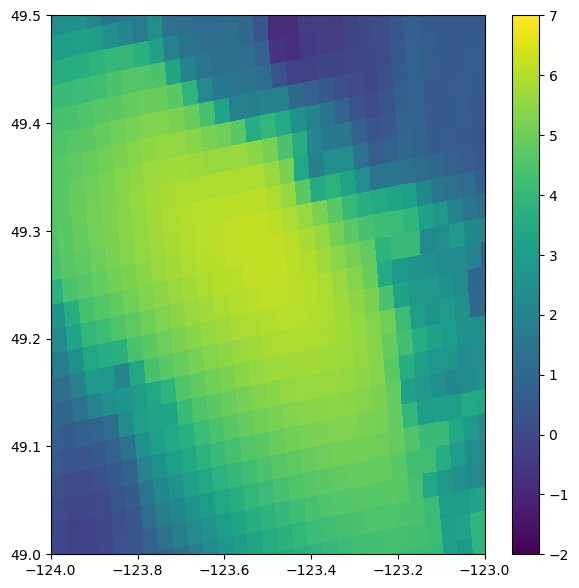

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colours = ax.pcolormesh(data_u.longitude[imin:imax, jmin:jmax], data_u.latitude[imin:imax, jmin:jmax], data_u.u10[imin:imax, jmin:jmax], vmax=7, vmin=-2);
fig.colorbar(colours);
ax.set_ylim(49, 49.5);
ax.set_xlim(236-360, 237-360);
print (data_u.u10[345, 395].values)

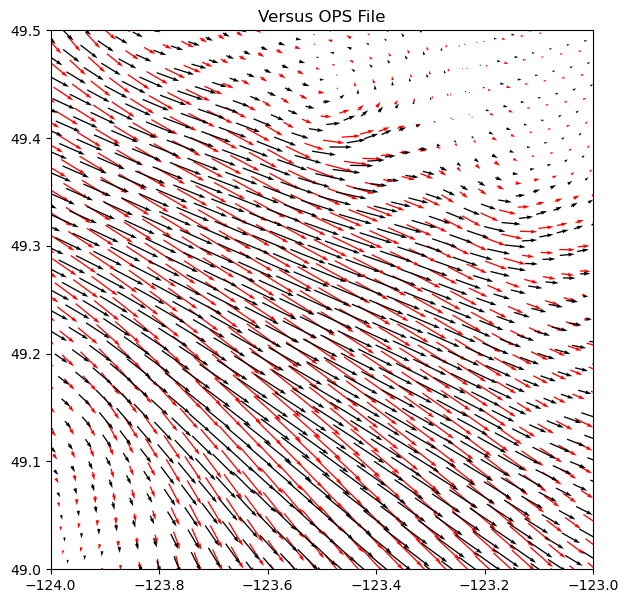

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.quiver(np.array(data_u.longitude[imin:imax, jmin:jmax]), np.array(data_u.latitude[imin:imax, jmin:jmax]), 
          np.array(data_u.u10[imin:imax, jmin:jmax]), np.array(data_v.v10[imin:imax, jmin:jmax]), scale=100, color='r')
ax.quiver(np.array(olddata.nav_lon)-360, np.array(olddata.nav_lat), np.array(olddata.u_wind[1]), np.array(olddata.v_wind[1]), scale=100)
ax.set_ylim(49, 49.5);
ax.set_xlim(236-360, 237-360);
ax.set_title('Versus OPS File');

In [17]:
data = xr.open_dataset('/data/sallen/results/uvrot_py.grib',
                      engine='cfgrib')

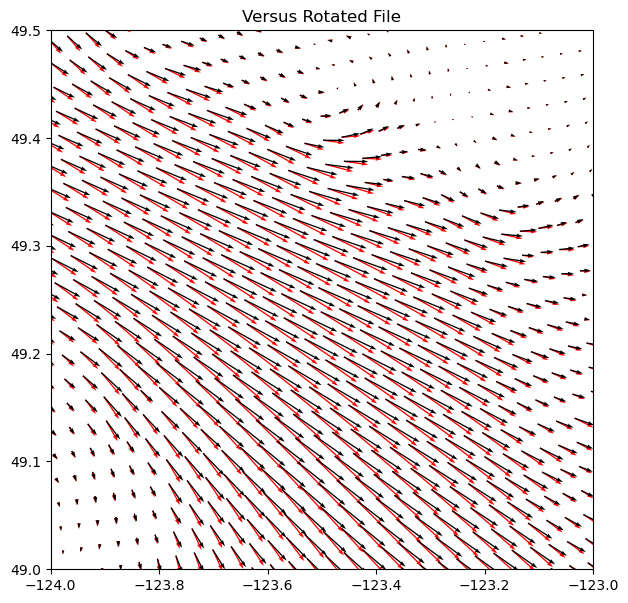

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.quiver(np.array(data_u.longitude[imin:imax, jmin:jmax]), np.array(data_u.latitude[imin:imax, jmin:jmax]), 
          np.array(data_u.u10[imin:imax, jmin:jmax]), np.array(data_v.v10[imin:imax, jmin:jmax]), scale=100, color='r')
ax.quiver(np.array(data.longitude[imin:imax, jmin:jmax]), np.array(data.latitude[imin:imax, jmin:jmax]), 
          np.array(data.u10[imin:imax, jmin:jmax]), np.array(data.v10[imin:imax, jmin:jmax]), scale=100, color='k')
ax.set_ylim(49, 49.5);
ax.set_xlim(236-360, 237-360);
ax.set_title('Versus Rotated File');